Author: Ahmed Youri Sobhi [ahmedyousrisobhi@gmail.com]

Creation_date: 8th Sep 2023

Notebook number : 4

Objective: Dataset Features Engineering.

Abstract:
- After exploring and analysis the current features we have in our dataset, let's engineer some important features to help us in our segmentation objective.

# Importing Required Libararies and Packages

In [47]:
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
import numpy as np

# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")


# Data Loading

In [48]:
df = (
    pd.read_csv('../data/intermid/marketing_campaign.csv')
    .assign(
        Dt_Customer= lambda x:pd.to_datetime(x.Dt_Customer, format='%Y-%m-%d')
    )
)

# Display first 5 rows
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,Partner


# Feature Engineering
There are possible features to create that would help us developing our segmentation clustring task.
|Feature|Description|
|--|--|
Customer_Age|Calculating the customer age would provide us with demographic feature for segmentation. 
Total_Spending|This feature reprenests the total amound spend by each customer on all products categories.</br>This can indicate a customer's overall purchasing behavior.
Total_Purchases|Calculating the total number of purchases made by each customers across all channels.
Acceptance_Rate|Calculating the acceptance rate of marketing campaigns for each customer.</br> This could be the sum of accepted campaigns divided by the total number of campaigns.
Channel_Preference|Determine a customer's preferred channel based on the highest number of purchases among different channels.
Avg_purchase_Amount|Calculating the average purchase amount for each customer by dividing the total spending by the total number of purchases
Campaign_Engagement|Creating a feature that sums the accepted campaigns and weights them by campaign importance or cost, giving more weight to campaigns that generated higher revenue.
Living_With| Converting the Marital Status into meaningfull description.
Num_children|This feature represents the number of children are in the home of each customers.
Family_Size|This feature represents the total member in the house.

In [49]:
# Customer Age
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [50]:
# Total Spending

# List of columns representing spending on different product categories
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total spending for each customer
df['Total_Spending'] = df[product_columns].sum(axis=1)

In [51]:
# Total Purchases

# List of columns representing spending on different purchases channels
channels_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
                   
# Calculate the total spending for each customer
df['Total_Purchases'] = df[channels_columns].sum(axis=1)

In [52]:
# Acceptance_Rate

# List of columns representing accepted campaigns (Cmp1 to Cmp5)
accepted_campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate the total number of accepted campaigns for each customer
df['Total_Accepted_Campaigns'] = df[accepted_campaign_columns].sum(axis=1)

# Total number of marketing campaigns
total_campaigns = len(accepted_campaign_columns)

# Calculate the acceptance rate for each customer
df['Acceptance_Rate'] = df['Total_Accepted_Campaigns'] / total_campaigns


In [53]:
# Channel_Preference

# Define the purchase channels
channels = {
    'NumWebPurchases':'Web',
    'NumStorePurchases':'Store',
    'NumCatalogPurchases':'Catalog'
}

# Create a new column 'Channel_Preference' with the preferred channel for each customer
df['Channel_Preference'] = df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].idxmax(axis=1)
df['Channel_Preference'] = df['Channel_Preference'].replace(channels)

In [54]:
# Avg_purchase_Amount

# List of columns representing spending on different product categories
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total spending for each customer
df['Total_Spending'] = df[product_columns].sum(axis=1)

# List of columns representing the number of purchases in different channels
purchase_columns = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']

# Calculate the total number of purchases for each customer
df['Total_Purchases'] = df[purchase_columns].sum(axis=1)

# Calculate the average purchase amount for each customer
df['Average_Purchase_Amount'] = df['Total_Spending'] / df['Total_Purchases']


In [55]:
# Campaign_Engagement

# Based on the EDA analysis in the previous notebook, it was shown that the most used compaing in descending orders are:
campaigns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Let's assume the weights Importance of each Campaing based on the most used campaign
campaign_weights = [0.5, 0.4, 0.3, 0.2, 0.1]

# Calculate the total campaign engagement for each customer
df['Campaign_Engagement'] = (df[campaigns] * campaign_weights).sum(axis=1)

In [56]:
# Living_With

df['Living_With'] = df["Marital_Status"].replace({
    "Married":"Partner", 
    "Together":"Partner", 
    "Absurd":"Alone", 
    "Widow":"Alone", 
    "YOLO":"Alone", 
    "Divorced":"Alone", 
    "Single":"Alone",})

# Drop the Marital_Status column
df.drop('Marital_Status', axis=1, inplace=True)

In [57]:
# Num_Children
df['Num_Children'] = df['Kidhome'] + df['Teenhome']

In [58]:
# Family_Size
df['Family_Size'] = df['Living_With'].replace({'Alone':1, 'Partner':2}) + df['Num_Children']

In [59]:
#Dropping some of the redundant features
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", 'Total_Accepted_Campaigns', 'Total_Spending', 'Total_Purchases', 'Num_Children']
df_processed = df.drop(to_drop, axis=1)

# Correlation

In [60]:
corr_matrix = df_processed.corr()

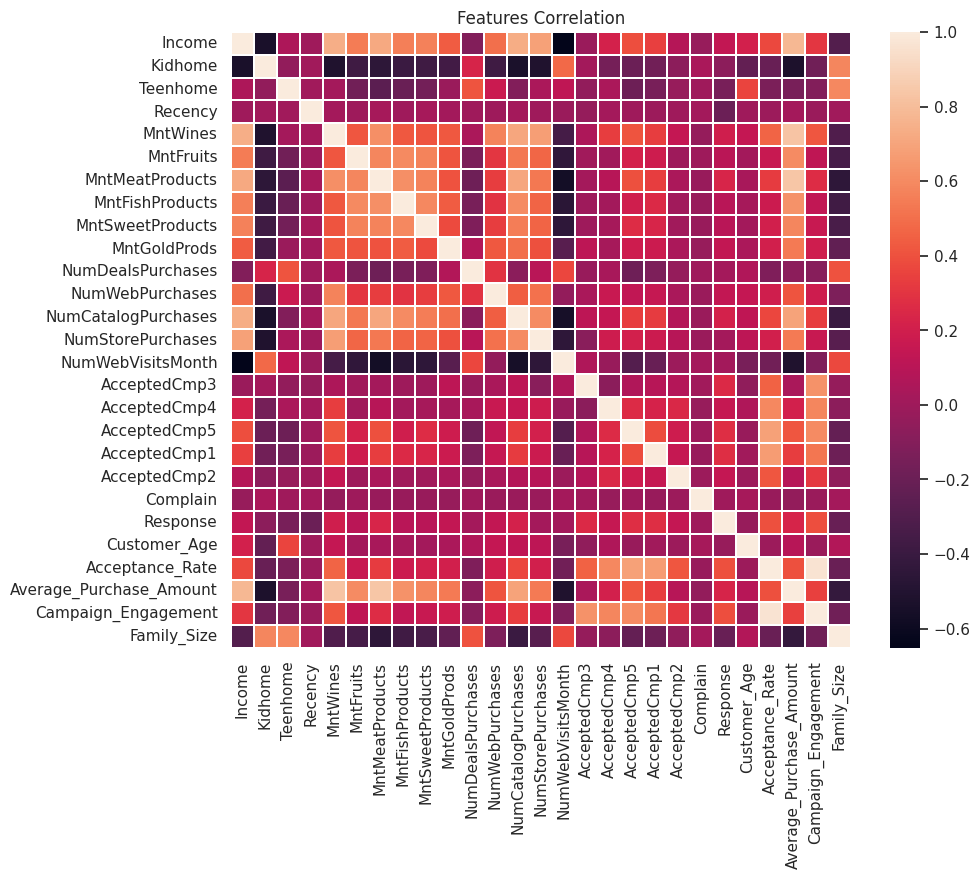

In [61]:
_, ax = plt.subplots(figsize =(10,8)) 
sns.heatmap(corr_matrix,ax = ax, linewidths = 0.1)
plt.title('Features Correlation')
plt.savefig('../report/plots/correlation.jpg')
plt.show()

In [62]:
# Simplify by emptying all the data below the diagonal
# np.tril_indices_from will return the indecies diagonal and below (lower triangle)
tril_index = np.tril_indices_from(corr_matrix)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_matrix.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a dataframe
corr_values = (corr_matrix
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

corr_values

,feature1,feature2,correlation,abs_correlation
0,Income,Kidhome,-0.536139,0.536139
1,Income,Teenhome,0.057529,0.057529
2,Income,Recency,0.002337,0.002337
3,Income,MntWines,0.737136,0.737136
4,Income,MntFruits,0.546006,0.546006
...,...,...,...,...
346,Acceptance_Rate,Campaign_Engagement,0.964258,0.964258
347,Acceptance_Rate,Family_Size,-0.205553,0.205553
348,Average_Purchase_Amount,Campaign_Engagement,0.347178,0.347178
349,Average_Purchase_Amount,Family_Size,-0.423036,0.423036


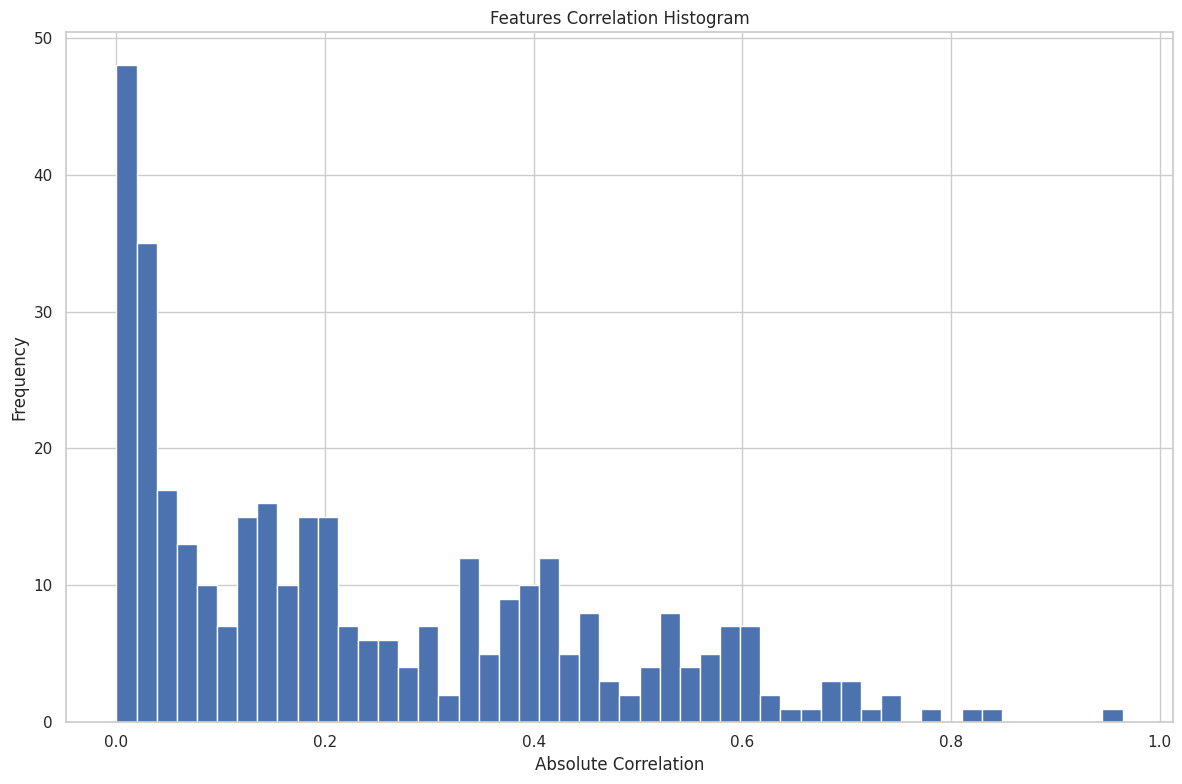

In [63]:
# Plotting the histplot to get an overview of the features correlation
ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')
plt.title('Features Correlation Histogram')
# Adjust the layout of subplots
plt.tight_layout()
plt.savefig(f'../report/plots/Features Correlation Histogram.jpg')
plt.show()

In [64]:
df_highly_correlated_feat = corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

df_highly_correlated_feat

,feature1,feature2,correlation,abs_correlation
346,Acceptance_Rate,Campaign_Engagement,0.964258,0.964258
158,MntMeatProducts,Average_Purchase_Amount,0.835888,0.835888
117,MntWines,Average_Purchase_Amount,0.827240,0.827240


In [70]:
# We Can drop the highly correlated features, but we will do PCA for dimentionality reduction
df_highly_correlated_feat.feature1.values.tolist()

['Acceptance_Rate', 'MntMeatProducts', 'MntWines']

In [66]:
to_drop

['Dt_Customer',
 'Z_CostContact',
 'Z_Revenue',
 'Year_Birth',
 'ID',
 'Total_Accepted_Campaigns',
 'Total_Spending',
 'Total_Purchases',
 'Num_Children',
 'Acceptance_Rate',
 'MntMeatProducts',
 'MntWines']

In [67]:
df_processed.shape

(2143, 30)

## Save dataset locally

In [68]:
df.to_csv('../data/output/marketing_campaign.csv', index=False)
df_highly_correlated_feat.to_csv('../data/output/highly_correlated_feat.csv', index=False)